In [1]:
import os
import glob
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

In [2]:
def retrieve(start, end, data):
    
    """
    This is a function used to retrieve timeseries data within specific time duration.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset/file (needs to be either a dataframe or filename string)
        
    Return:
        data_df: a dataframe that shows the within the defined time range
    """
    import os
    import datetime as dt
    from datetime import datetime
    import pandas as pd
    from zoneinfo import ZoneInfo
    
    if isinstance(data, str):
        path = 'clean_data'
        path = os.path.join(path, data)
        data = pd.read_csv(path)
    elif isinstance(data, pd.DataFrame):
        data = data
    else:
        raise TypeError("input must be a string or a dataframe")
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'], utc=True).dt.tz_convert('America/Los_Angeles')
    start = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone)
    end = datetime.strptime(end, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone)
    after_start_date = data["date"] >= start
    before_end_date = data["date"] <= end
    between_two_dates = after_start_date & before_end_date
    
    # Using pandas.DataFrame.loc to Filter Rows by Dates
    data_df = data.loc[between_two_dates]
    return data_df

In [3]:
retrieve('2018-06-01 00:00:00', '2018-07-01 00:00:00', 'site_weather.csv').head(60)

,date,air_temp_set_1,air_temp_set_2,dew_point_temperature_set_1d,relative_humidity_set_1,solar_radiation_set_1
14524,2018-06-01 00:00:00-07:00,10.89,11.05,6.97,77.00,0.03
14525,2018-06-01 00:15:00-07:00,10.88,10.98,6.83,76.30,0.02
14526,2018-06-01 00:30:00-07:00,10.77,10.84,6.84,76.88,0.03
14527,2018-06-01 00:45:00-07:00,10.77,10.74,6.82,76.82,0.06
14528,2018-06-01 01:00:00-07:00,10.72,10.76,7.30,79.60,0.03
14529,2018-06-01 01:15:00-07:00,10.57,10.55,7.59,82.00,0.04
14530,2018-06-01 01:30:00-07:00,10.44,10.46,7.59,82.70,0.03
14531,2018-06-01 01:45:00-07:00,10.36,10.34,7.46,82.40,0.05
14532,2018-06-01 02:00:00-07:00,10.36,10.27,7.37,81.90,0.02
14533,2018-06-01 02:15:00-07:00,10.21,10.27,7.28,82.20,0.02


In [4]:
print(retrieve.__doc__)


    This is a function used to retrieve timeseries data within specific time duration.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset/file (needs to be either a dataframe or filename string)
        
    Return:
        data_df: a dataframe that shows the within the defined time range
    


In [5]:
def hourly(start, end, data):
    
    """
    This is a function defined to derive hourly summary of the dataset.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset
        
    Return:
        data_df: a dataframe that shows the hourly summary of the input dataset

    """
    
    import datetime as dt
    from datetime import datetime
    import numpy as np
    from zoneinfo import ZoneInfo
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'])
    interval = dt.timedelta(hours=1)
    value_df = pd.DataFrame()
    time_df = pd.DataFrame()
    data_temp = pd.Series(dtype='object')
    while start < end:
        end_next = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone) + interval
        end_next = datetime.strftime(end_next, "%Y-%m-%d %H:%M:%S")
        value = retrieve(start, end_next, data).mean(numeric_only=True)
        date = pd.Series({'date': start}, dtype='datetime64[ns]')
        value_df = pd.concat([value_df, pd.DataFrame(value).transpose()], axis = 0)
        time_df = pd.concat([time_df, pd.DataFrame(date).transpose()], axis = 0)
        start = end_next

    hourly_df = pd.concat([time_df, value_df], axis = 1).reset_index(drop=True)
    
    return hourly_df

In [6]:
data = retrieve('2018-05-01 00:00:00', '2018-07-01 00:00:00', 'rtu_oa_damper.csv')

In [7]:
hourly('2018-05-01 00:00:00', '2018-06-01 00:00:00', data)

,date,rtu_001_oadmpr_pct,rtu_002_oadmpr_pct,rtu_003_oadmpr_pct,rtu_004_oadmpr_pct
0,2018-05-01 00:00:00,32.809836,33.245902,36.340984,28.980328
1,2018-05-01 01:00:00,29.357377,28.845902,33.400000,28.000000
2,2018-05-01 02:00:00,30.416393,29.432787,35.245902,28.000000
3,2018-05-01 03:00:00,30.285246,29.016393,34.570492,28.000000
4,2018-05-01 04:00:00,28.000000,30.675410,33.809836,28.000000
...,...,...,...,...,...
739,2018-05-31 19:00:00,38.917190,50.561560,51.657480,41.527214
740,2018-05-31 20:00:00,38.182581,49.974625,50.971428,40.746311
741,2018-05-31 21:00:00,38.424754,50.448415,51.087699,40.888574
742,2018-05-31 22:00:00,38.433045,50.439604,51.078445,40.858162


In [8]:
print(hourly.__doc__)


    This is a function defined to derive hourly summary of the dataset.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset
        
    Return:
        data_df: a dataframe that shows the hourly summary of the input dataset

    


In [9]:
def daily(start, end, data):
    
    """
    This is a function defined to derive daily summary of the dataset.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset
        
    Return:
        data_df: a dataframe that shows the daily summary of the input dataset

    """
    
    import datetime as dt
    from datetime import datetime
    import numpy as np
    from zoneinfo import ZoneInfo
    
    timezone = ZoneInfo('America/Los_Angeles')
    data['date'] = pd.to_datetime(data['date'])
    interval = dt.timedelta(days=1)
    value_df = pd.DataFrame()
    time_df = pd.DataFrame()
    data_temp = pd.Series(dtype='object')
    while start < end:
        end_next = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone) + interval
        end_next = datetime.strftime(end_next, "%Y-%m-%d %H:%M:%S")
        value = retrieve(start, end_next, data).mean(numeric_only=True)
        date = pd.Series({'date': start}, dtype='datetime64[ns]')
        value_df = pd.concat([value_df, pd.DataFrame(value).transpose()], axis = 0)
        time_df = pd.concat([time_df, pd.DataFrame(date).transpose()], axis = 0)
        start = end_next

    daily_df = pd.concat([time_df, value_df], axis = 1).reset_index(drop=True)
    
    return daily_df

In [10]:
daily('2018-05-01 00:00:00', '2018-06-01 00:00:00', data).head(60)

,date,rtu_001_oadmpr_pct,rtu_002_oadmpr_pct,rtu_003_oadmpr_pct,rtu_004_oadmpr_pct
0,2018-05-01,38.592228,43.606662,51.128661,40.337405
1,2018-05-02,39.699237,42.229285,49.639695,38.438862
2,2018-05-03,38.762974,40.449872,53.084594,36.619996
3,2018-05-04,38.120309,49.877468,50.955767,40.677146
4,2018-05-05,38.246118,50.013352,51.018428,40.771074
5,2018-05-06,38.021184,49.878611,50.923979,40.687743
6,2018-05-07,38.160675,49.920128,50.900405,40.703092
7,2018-05-08,39.836738,53.969545,61.731776,48.826027
8,2018-05-09,43.393695,57.490108,69.251311,53.200644
9,2018-05-10,48.461308,60.762227,61.232536,47.280378


In [11]:
print(daily.__doc__)


    This is a function defined to derive daily summary of the dataset.
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        data: the name of the dataset
        
    Return:
        data_df: a dataframe that shows the daily summary of the input dataset

    


In [12]:
def ts_plot(data, col_name, fig_size, separate=False):
    """
    This is a function defined to make time series plot
    
    Arg:
        data: The dataset needed for the plot
        col_name: a list of vairable names that go into the plot
        separate: a boolean asking if variables should be separately plotted, default is set as FALSE
        fig_size: matplotlib plotting argument for adjusting figure size
        
    Return:
        A plot or subplots
    """
    
    import matplotlib.pyplot as plt
    
    if not col_name:
        raise ValueError("Input list cannot be empty.")
        
    if separate:
        plot_number = len(col_name)
        fig, axs = plt.subplots(nrows = plot_number, ncols = 1, figsize = fig_size)
        for i, ax in enumerate(axs.flatten()):
            ax.plot(data['date'], data[col_name[i]])
            ax.set_title(col_name[i], fontsize = 13)
            ax.set_xlabel('Date', fontsize = 11)
            plt.sca(ax)
            plt.xticks(rotation=45, fontsize = 7)
        fig.subplots_adjust(hspace=0.75)
    else:
        plt.figure(figsize = fig_size)
        for i in col_name:
            plt.plot(data['date'], data[i])
            plt.title(i, fontsize = 15)
            plt.xlabel('Date', fontsize = 12)
            plt.legend(col_name, loc='best')
            plt.xticks(rotation=45, fontsize = 8)

In [13]:
weather_data = retrieve('2018-06-01 00:00:00', '2018-06-10 00:00:00', 'site_weather.csv')

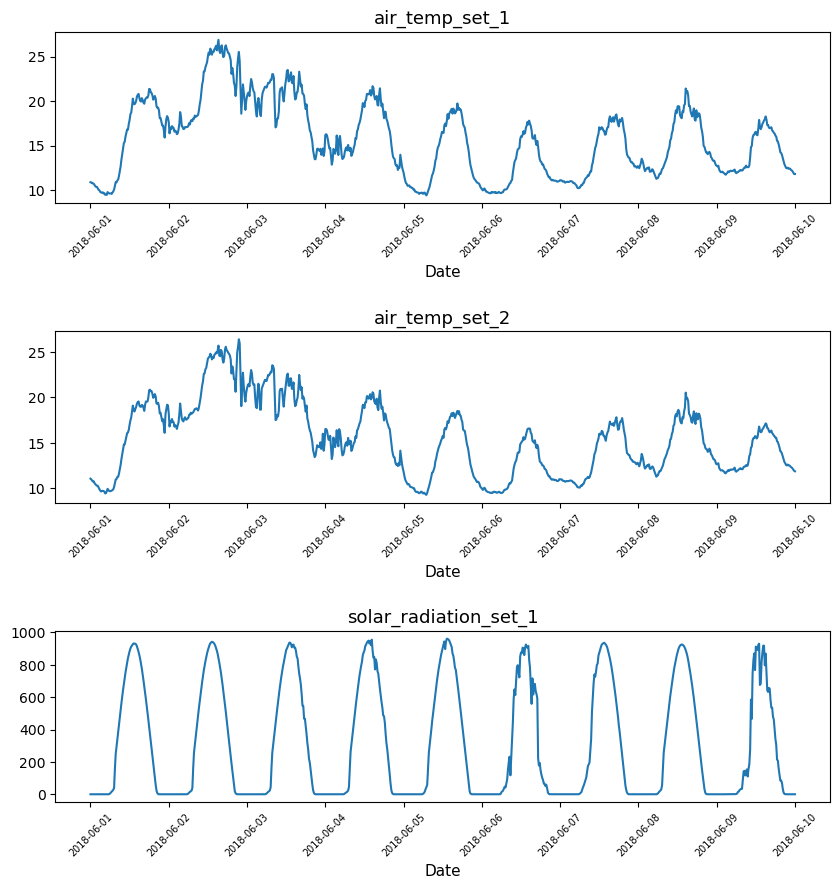

In [14]:
ts_plot(weather_data, ['air_temp_set_1', 'air_temp_set_2', 'solar_radiation_set_1'], [10, 10], separate = True)

In [15]:
print(ts_plot.__doc__)


    This is a function defined to make time series plot
    
    Arg:
        data: The dataset needed for the plot
        col_name: a list of vairable names that go into the plot
        separate: a boolean asking if variables should be separately plotted, default is set as FALSE
        fig_size: matplotlib plotting argument for adjusting figure size
        
    Return:
        A plot or subplots
    


In [16]:
retrieve('2018-05-01 00:00:00', '2018-07-01 00:00:00', 'rtu_ra_t.csv')

,date,rtu_001_ra_temp,rtu_002_ra_temp,rtu_003_ra_temp,rtu_004_ra_temp
117008,2018-05-01 00:00:00-07:00,70.8,70.6,70.4,71.4
117009,2018-05-01 00:01:00-07:00,70.8,70.6,70.4,71.3
117010,2018-05-01 00:02:00-07:00,70.8,70.6,70.3,71.4
117011,2018-05-01 00:03:00-07:00,70.8,70.7,70.3,71.4
117012,2018-05-01 00:04:00-07:00,70.8,70.6,70.3,71.4
...,...,...,...,...,...
165325,2018-06-30 23:56:00-07:00,71.1,69.6,70.4,71.0
165326,2018-06-30 23:57:00-07:00,71.0,69.5,70.5,71.1
165327,2018-06-30 23:58:00-07:00,71.0,69.6,70.3,71.0
165328,2018-06-30 23:59:00-07:00,71.0,69.5,70.5,71.0


In [17]:
def rtu_energy_hourly(start, end, unit):
    """
    This is a function defined to calculate thermal energy input by using outdoor air temperature, supply air temperature and air flow rate, from the rooftop unit for air conditioning
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        unit: indicating which rooftop unit
    
    Return:
        Energy timeseries from calculation
    
    """
    if unit not in range(1, 5):
        raise ValueError("Input rooftop unit not included, only unit 1~4 are available")
    else:
        ma_name = ['rtu_001_ma_temp', 'rtu_002_ma_temp', 'rtu_003_ma_temp', 'rtu_004_ma_temp'][unit - 1]
        sat_name = ['rtu_001_sa_temp', 'rtu_002_sa_temp', 'rtu_003_sa_temp', 'rtu_004_sa_temp'][unit - 1]
        afr_name = ['rtu_001_fltrd_sa_flow_tn', 'rtu_002_fltrd_sa_flow_tn', 'rtu_003_fltrd_sa_flow_tn', 'rtu_004_fltrd_sa_flow_tn'][unit - 1]
        
    ma_data = retrieve(start, end, 'rtu_ma_t.csv')[['date', ma_name]]
    ma_hourly = hourly(start, end, ma_data)

    sat_data = retrieve(start, end, 'rtu_sa_t.csv')
    sat_hourly = hourly(start, end, sat_data)[['date', sat_name]]

    afr_data = retrieve(start, end, 'rtu_sa_fr.csv')
    afr_hourly = hourly(start, end, afr_data)[['date', afr_name]]

    temp_hourly = pd.merge(left=ma_hourly, right=sat_hourly, left_on='date', right_on='date')
    temp_hourly['delta_T'] = (temp_hourly[ma_name] - temp_hourly[sat_name])
    energy_hourly = pd.merge(left=temp_hourly, right=afr_hourly, left_on='date', right_on='date')
    energy_hourly['energy_kw'] = energy_hourly['delta_T'] * energy_hourly[afr_name] * 1.08 / 3412
        
    return energy_hourly

In [18]:
rtu_energy_hourly('2019-08-01 00:00:00', '2019-08-02 00:00:00', 3)

,date,rtu_003_ma_temp,rtu_003_sa_temp,delta_T,rtu_003_fltrd_sa_flow_tn,energy_kw
0,2019-08-01 00:00:00,65.772131,65.029508,0.742623,12100.908598,2.844468
1,2019-08-01 01:00:00,65.680328,65.024590,0.655738,11989.029746,2.488450
2,2019-08-01 02:00:00,65.760656,65.003279,0.757377,12148.269008,2.912335
3,2019-08-01 03:00:00,65.763934,65.019672,0.744262,11880.246549,2.798764
4,2019-08-01 04:00:00,65.813115,65.109836,0.703279,11804.463893,2.627777
5,2019-08-01 05:00:00,65.711475,65.026230,0.685246,12000.359672,2.602888
6,2019-08-01 06:00:00,65.790164,65.031148,0.759016,12118.940516,2.911592
7,2019-08-01 07:00:00,65.760656,65.039344,0.721311,11672.740000,2.665081
8,2019-08-01 08:00:00,65.785246,65.026230,0.759016,11148.110082,2.678349
9,2019-08-01 09:00:00,65.719672,64.983607,0.736066,11160.779893,2.600314


In [19]:
def rtu_energy_daily(start, end, unit):
    """
    This is a function defined to calculate thermal energy input by using outdoor air temperature, supply air temperature and air flow rate, from the rooftop unit for air conditioning
    
    Arg:
        start: the start time of the dataset (format: %Y-%m-%d %H:%M:%S)
        end: the end time of the dataset (format: %Y-%m-%d %H:%M:%S)
        unit: indicating which rooftop unit
    
    Return:
        Energy timeseries from calculation
    
    """
    import pandas as pd
    import datetime as dt
    from datetime import datetime
    from zoneinfo import ZoneInfo
    
    if unit not in range(1, 5):
        raise ValueError("Input rooftop unit not included, only unit 1~4 are available")
        
    else:
        data = rtu_energy_hourly(start, end, unit)
        timezone = ZoneInfo('America/Los_Angeles')
        interval = dt.timedelta(days=1)
        value_df = pd.DataFrame()
        time_df = pd.DataFrame()
        data_temp = pd.Series(dtype='object')
        while start < end:
            end_next = datetime.strptime(start, "%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone) + interval
            end_next = datetime.strftime(end_next, "%Y-%m-%d %H:%M:%S")
            value = rtu_energy_hourly(start, end_next, unit).sum(numeric_only=True)
            date = pd.Series({'date': start}, dtype='datetime64[ns]')
            value_df = pd.concat([value_df, pd.DataFrame(value).transpose()], axis = 0)
            time_df = pd.concat([time_df, pd.DataFrame(date).transpose()], axis = 0)
            start = end_next
        
        energy_daily = pd.concat([time_df, value_df], axis = 1).reset_index(drop=True)
        
    return energy_daily

In [20]:
rtu_energy_daily('2019-08-01 00:00:00', '2019-09-01 00:00:00', 3)

,date,rtu_003_ma_temp,rtu_003_sa_temp,delta_T,rtu_003_fltrd_sa_flow_tn,energy_kw
0,2019-08-01,1580.388525,1559.911475,20.477049,291488.521787,79.157812
1,2019-08-02,1635.329508,1559.439344,75.890164,307700.306746,313.006978
2,2019-08-03,1621.155738,1559.934426,61.221311,306484.191115,246.771705
3,2019-08-04,1623.004918,1560.229508,62.775410,305694.693975,257.683657
4,2019-08-05,1597.134426,1560.495082,36.639344,304546.274082,148.336136
5,2019-08-06,1600.881967,1560.868852,40.013115,306237.776746,160.983023
6,2019-08-07,1585.954098,1558.781967,27.172131,312648.320270,112.893813
7,2019-08-08,1578.219672,1562.240984,15.978689,317651.265131,66.892963
8,2019-08-09,1599.209836,1558.863934,40.345902,336718.206287,177.298155
9,2019-08-10,1579.655738,1560.337705,19.318033,318388.936697,77.262698
